**Exercício 1 Redes Neurais**

Alunos: 
> Italo Rodrigo Barbosa Paulino - irbp 

> José Nilton de Oliveira Lima Júnior - jnolj



In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [0]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

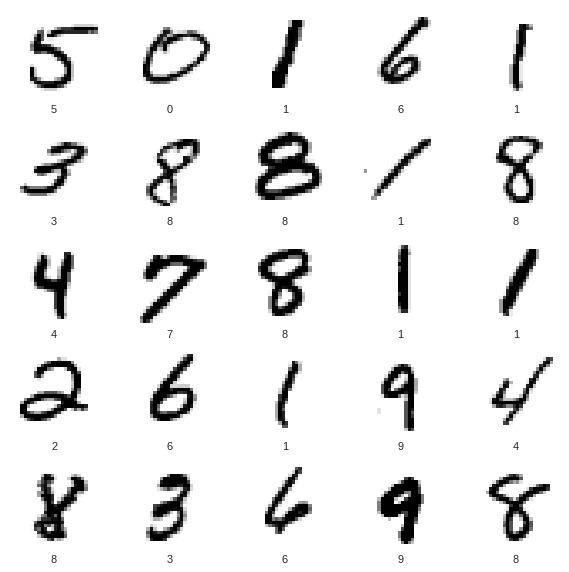

In [45]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [66]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')
callbacks_list = [earlystop]

Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(320, activation=tf.tanh))
model.add(Dense(30, activation=tf.tanh))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(optimizer= tf.keras.optimizers.SGD(lr=3.0),
              loss='mse',
              metrics=['accuracy'])

In [68]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 320)               251200    
_________________________________________________________________
dense_13 (Dense)             (None, 30)                9630      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                310       
Total params: 261,140
Trainable params: 261,140
Non-trainable params: 0
_________________________________________________________________


In [72]:
history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=128, callbacks=callbacks_list)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 45us/step - loss: 0.0198 - acc: 0.8757 - val_loss: 0.0114 - val_acc: 0.9273
Epoch 2/100
48000/48000 [==============================] - 2s 36us/step - loss: 0.0110 - acc: 0.9298 - val_loss: 0.0093 - val_acc: 0.9402
Epoch 3/100
48000/48000 [==============================] - 2s 36us/step - loss: 0.0090 - acc: 0.9432 - val_loss: 0.0084 - val_acc: 0.9465
Epoch 4/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.0078 - acc: 0.9510 - val_loss: 0.0075 - val_acc: 0.9540
Epoch 5/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.0069 - acc: 0.9574 - val_loss: 0.0070 - val_acc: 0.9555
Epoch 6/100
48000/48000 [==============================] - 2s 36us/step - loss: 0.0061 - acc: 0.9633 - val_loss: 0.0064 - val_acc: 0.9589
Epoch 7/100
48000/48000 [==============================] - 2s 35us/step - loss: 0.0055 - acc: 0.9658 - val_loss: 0.0065 - 

In [73]:
loss, acc = model.evaluate(x_test, y_test)
print("Accuracy: {}%".format(acc * 100))

10000/10000 [==============================] - 0s 47us/step
Accuracy: 97.25%


In [0]:
predictions = model.predict(x_test)
pred_labels = np.argmax(predictions, axis=1)

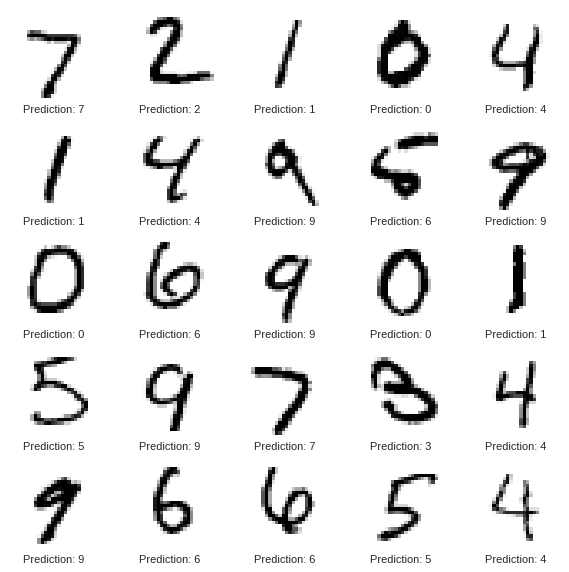

In [75]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("Prediction: {}".format(np.argmax(predictions[i])))

In [0]:
def plot_confusion_matrix(cm, classes):
    cmap = plt.get_cmap('Reds')
    tick_marks = classes

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title("Confusion matrix")
    plt.colorbar()
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], '.2f'),
                     horizontalalignment='center',
                     color='white' if cm[i , j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

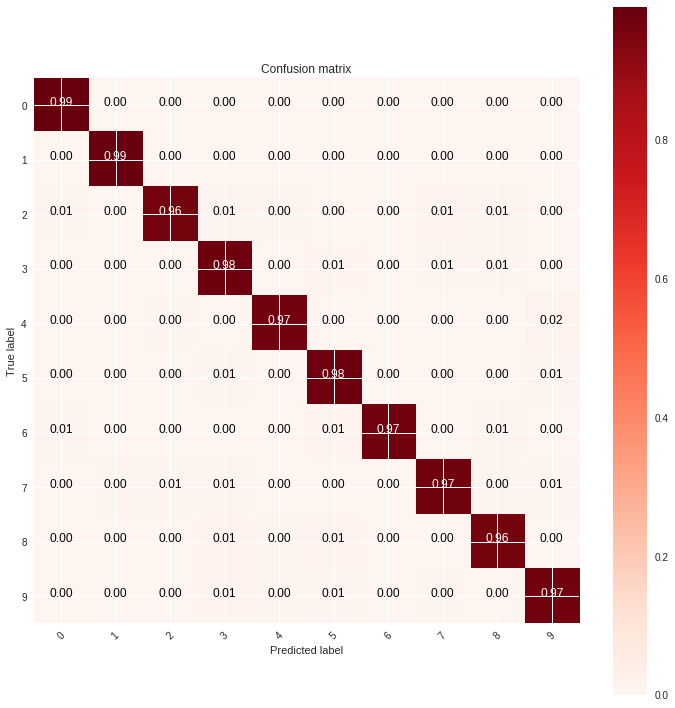

In [81]:
cm = confusion_matrix(y_test, pred_labels)
classes = np.arange(predictions.shape[1])
plot_confusion_matrix(cm, classes)

In [0]:
def plot_training_error_curves(history):
    """Função para plotar as curvas de erro do treinamento da rede neural.
    
    Argumento(s):
    history -- Objeto retornado pela função fit do keras.
    
    Retorno:
    A função gera o gráfico do treino da rede e retorna None.
    """
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    fig, ax = plt.subplots()
    ax.plot(train_loss, label='Train')
    ax.plot(val_loss, label='Validation')
    ax.set(title='Training and Validation Error Curves', xlabel='Epochs', ylabel='Loss (MSE)')
    ax.legend()
    plt.show()


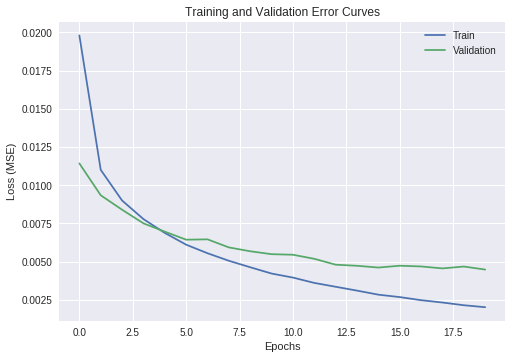

In [79]:
plot_training_error_curves(history)